In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os

import skimage.io
from skimage.io import imread

from pandas.compat import StringIO
import re

import sys
from collections import Counter

from mpl_toolkits.basemap import Basemap

# Of what customers' ratings of restaurants are affected?
## Author: Martin Topalov

### Abstract
В това изследване ще разберем за съществуването на някои зависимости между оценките на хората на даден ресторант и други показатели като цена, тип кухня, град. Ще покажем и дали има подобна връзка и между оценаването на клиентите и хранителното съдържание на храните. В това проучване ще наблегнем на мазнините, съдържащи се в 100 грама хранителен продукт.

In these research we will understand for some dependency between the ratings of the people of a restaurant and other properties like price, type of cuisine, city and ect.

### Previous research
During the last few years, reviews have become crucial to the success of a restaurant, as every restaurant owner is aware of the fact that good reviews can boost popularity and profitability, whereas terrible reviews even have the potential of closing businesses down. That's why it is crucial for restauranteurs to understand the impact of review websites such as Yelp, Toptable or TripAdvisors and the role they play the success or downfall of a business.
In a recent research report published by the experts at  Website Builder, approximately 61% of customers have read online reviews about restaurants. While such a significant number people tend to read online reviews prior to visiting a particular restaurant to dine or hosting an event, it is also worth pointing out that around 34% of diners currently choose restaurants based solely on information offered on peer review websites. This means that most diners disregard the restaurant’s website or social media pages, preferring  to rely  on data present on review sites,  further increasing their importance and influence on the market. Another interesting fact is that approximately 53% of the coveted 18 to 34-year-old demographic reported that online reviews play an important role into their dining decisions.

An independent survey of 12 000 travellers, conducted by PhoCusWright, revealed that 75% of people now use TripAdvisor before booking a hotel, and just over half use the site before choosing a restaurant.
Around 53% said they would not book a hotel that had no reviews, while 31% said they would avoid eating at a restaurant that had no reviews.
Quantity of reviews is also important, the study found, with majority of people reading at least 6-12 reviews before making a booking. This average was lower for restaurants, although 20% of respondents said they read over 11 reviews before making a decision.
Although bad reviews can put people off booking, the study confirmed that hotels and restaurants can lessen the impact of bad reviews by responding quickly and appropriately. Around 62% of users agreed that seeing hotel managment responses to reviews made them more likely to book, while 87% of users agreed that an appropriate managment response to a bad review would improve their impression of the hotel.
73% of people said they were likely to look at traveller submitted photos, while 65% said they were more likely to book properties that had won Tripadvisor awards.

According to a study by Woo Gong Kim and Jun Li: 
* The  number  of  online  reviews  is  positively  associated  with restaurant  performance.
* Restaurant  rankings  are  positively  associated  with  restaurant performance.
* Restaurant  operating  efficiency  is  positively  associated  with restaurant  performance.
* Excellence  certificate  moderates  the  effect  of  determinants (number  of  online  reviews,  restaurant  rankings,  and  operational efficiency)  on  restaurant  performance.

### Първи сет от данни - Хранителни вещества на продукти

### First dataset - Food nutrition for products

Започваме нашето изследване като заредим и прочетем сета с данни, който съдържа информация за състава на храните.

We start our research by loading and reading the data set containing information about food nutrition.

In [ ]:
data_nutrition = pd.read_csv("en.openfoodfacts.org.products.tsv", sep='\t', low_memory=False)
data_nutrition

Отпечатваме формата на сета за да разберем с какъв обем от данни работим.

We print the shape of the set to know what is the amount of data we will work with.

In [ ]:
print(data_nutrition.shape)

Извеждаме всички имена на колоните в сета за да придобием представа с какви данни работим.

We list column names of the set to get an idea of what data we're working on.

In [ ]:
list(data_nutrition)

Проверяваме бороя на уникалните елементи в колона "code" за да преценим дали да я направим индекс на нашата таблица.

We check the number of the unique elements in the "code" column to decide whether to make it an index on our table.

In [ ]:
len(data_nutrition["code"].unique())

Видяхме, че броят на данните в колона "code" е по-малка от общият брой, което означава, че има повтарящи се кодове и затова няма да я направим индексна колона.

We sее that the number of data in the "code" column is less than the total, which means that there are repeatable codes and for that reason we woudn't do "code" column as an index.

Започваме с обработката на първият, за нашето изследване, сет като изтрием колоните, които няма да са нужни за целта на нашето изследване. Както и на колоните, които имат изцяло нулеви стойности.

We begin with the processing of the first set for our research by dropping the columns that will not be needed for the purpose of our research. As well as on columns that have totally zero values.

In [ ]:
drop_columns_list = ["url", "creator", "created_t", "created_datetime", "last_modified_t", "last_modified_datetime",
                     "packaging", "packaging_tags", "brands", "brands_tags", "categories", "categories_tags",
                     "categories_en", "origins", "origins_tags", "manufacturing_places", "manufacturing_places_tags", 
                     "labels", "labels_tags", "labels_en", "emb_codes", "emb_codes_tags", "first_packaging_code_geo", 
                     "cities", "cities_tags", "purchase_places", "stores", "countries", "countries_tags", 
                     "ingredients_text", "allergens", "allergens_en", "traces", "traces_tags", "quantity", "countries_en", 
                     "traces_en", "serving_size", "no_nutriments", "additives_n", "additives", "additives_tags", "additives_en", 
                     "ingredients_from_palm_oil", "ingredients_from_palm_oil_n", "ingredients_from_palm_oil_tags", 
                     "ingredients_that_may_be_from_palm_oil_n", "ingredients_that_may_be_from_palm_oil", 
                     "ingredients_that_may_be_from_palm_oil_tags", "nutrition_grade_uk", "states", "states_tags", 
                     "states_en", "main_category", "image_url", "image_small_url"]

In [ ]:
data_nutrition = data_nutrition.drop(drop_columns_list, axis=1)

In [ ]:
drop_null_columns = data_nutrition.columns[data_nutrition.isna().all()].tolist()
data_nutrition = data_nutrition.drop(drop_null_columns, axis=1)

In [ ]:
print(data_nutrition.shape)

Проверяваме дали колони "product_name" и "generic_name" са с еднаква дължина за да преценим дали можем да оставим само едната колона.

Check whether columns "product_name" and "generic_name" are of the same length to consider whether we can leave only one column of these two.

In [ ]:
len(data_nutrition["product_name"])

In [ ]:
len(list(data_nutrition["generic_name"].unique()))

In [ ]:
data_nutrition["product_name"].isnull().sum()

In [ ]:
data_nutrition["product_name"].notnull().sum()

Взимаме редовете, които имат име на продукта.

Take the observations which have a product name.

In [ ]:
data_nutrition = data_nutrition[data_nutrition["product_name"].notnull()]

Извеждаме имената на уникалните категории.

List the unique category names.

In [ ]:
list(data_nutrition["pnns_groups_2"].unique())

Взимаме редовете, които имат категория в колона "pnns_groups_2".

Take observations which have a category in "pnns_groups_2" column.

In [ ]:
data_nutrition_with_categories = data_nutrition[data_nutrition["pnns_groups_2"].notnull() == True]

In [ ]:
len(data_nutrition_with_categories)

Премахваме редовете с категориите, които няма да ни трябват.

Drop observations which have category that we wouldn't need.

In [ ]:
data_nutrition_with_categories = data_nutrition_with_categories.drop(data_nutrition_with_categories[data_nutrition_with_categories["pnns_groups_2"] == "Biscuits and cakes"].index)
data_nutrition_with_categories = data_nutrition_with_categories.drop(data_nutrition_with_categories[data_nutrition_with_categories["pnns_groups_2"] == "Bread"].index)
data_nutrition_with_categories = data_nutrition_with_categories.drop(data_nutrition_with_categories[data_nutrition_with_categories["pnns_groups_2"] == "Sweetened beverages"].index)
data_nutrition_with_categories = data_nutrition_with_categories.drop(data_nutrition_with_categories[data_nutrition_with_categories["pnns_groups_2"] == "Pizza pies and quiche"].index)
data_nutrition_with_categories = data_nutrition_with_categories.drop(data_nutrition_with_categories[data_nutrition_with_categories["pnns_groups_2"] == "Sweets"].index)
data_nutrition_with_categories = data_nutrition_with_categories.drop(data_nutrition_with_categories[data_nutrition_with_categories["pnns_groups_2"] == "Non-sugared beverages"].index)
data_nutrition_with_categories = data_nutrition_with_categories.drop(data_nutrition_with_categories[data_nutrition_with_categories["pnns_groups_2"] == "Dressings and sauces"].index)
data_nutrition_with_categories = data_nutrition_with_categories.drop(data_nutrition_with_categories[data_nutrition_with_categories["pnns_groups_2"] == "Ice cream"].index)
data_nutrition_with_categories = data_nutrition_with_categories.drop(data_nutrition_with_categories[data_nutrition_with_categories["pnns_groups_2"] == "One-dish meals"].index)
data_nutrition_with_categories = data_nutrition_with_categories.drop(data_nutrition_with_categories[data_nutrition_with_categories["pnns_groups_2"] == "Appetizers"].index)
data_nutrition_with_categories = data_nutrition_with_categories.drop(data_nutrition_with_categories[data_nutrition_with_categories["pnns_groups_2"] == "Chocolate products"].index)
data_nutrition_with_categories = data_nutrition_with_categories.drop(data_nutrition_with_categories[data_nutrition_with_categories["pnns_groups_2"] == "Soups"].index)
data_nutrition_with_categories = data_nutrition_with_categories.drop(data_nutrition_with_categories[data_nutrition_with_categories["pnns_groups_2"] == "Sandwich"].index)
data_nutrition_with_categories = data_nutrition_with_categories.drop(data_nutrition_with_categories[data_nutrition_with_categories["pnns_groups_2"] == "Artificially sweetened beverages"].index)
data_nutrition_with_categories = data_nutrition_with_categories.drop(data_nutrition_with_categories[data_nutrition_with_categories["pnns_groups_2"] == "Fruit juices"].index)
data_nutrition_with_categories = data_nutrition_with_categories.drop(data_nutrition_with_categories[data_nutrition_with_categories["pnns_groups_2"] == "Breakfast cereals"].index)
data_nutrition_with_categories = data_nutrition_with_categories.drop(data_nutrition_with_categories[data_nutrition_with_categories["pnns_groups_2"] == "pastries"].index)
data_nutrition_with_categories = data_nutrition_with_categories.drop(data_nutrition_with_categories[data_nutrition_with_categories["pnns_groups_2"] == "Dairy desserts"].index)
data_nutrition_with_categories = data_nutrition_with_categories.drop(data_nutrition_with_categories[data_nutrition_with_categories["pnns_groups_2"] == "Fruit nectars"].index)
data_nutrition_with_categories = data_nutrition_with_categories.drop(data_nutrition_with_categories[data_nutrition_with_categories["pnns_groups_2"] == "Tripe dishes"].index)
data_nutrition_with_categories = data_nutrition_with_categories.drop(data_nutrition_with_categories[data_nutrition_with_categories["pnns_groups_2"] == "Salty and fatty products"].index)
data_nutrition_with_categories = data_nutrition_with_categories.drop(data_nutrition_with_categories[data_nutrition_with_categories["pnns_groups_2"] == "cereals"].index)

В нова таблица си записваме само редовете, които имат някаква записана стойност в колона "fat_100g", за да можем да изчисляваме по нея.

In new table we take only observations which have any recorded value in "fat_100g" column. We make this table to do our computations with it.

In [ ]:
data_with_fat_100g = data_nutrition_with_categories[data_nutrition_with_categories["fat_100g"].notnull()]
len(data_with_fat_100g)

Поставяме имената на продуктите в списък.

Put product names in a list.

In [ ]:
product_names_list = data_nutrition_with_categories["product_name"].tolist()

In [ ]:
data_nutrition_with_categories[data_nutrition_with_categories["product_name"] == "spaghetti in tomato sauce"]["pnns_groups_2"]

In [ ]:
tablica = data_nutrition_with_categories[data_nutrition_with_categories["product_name"] == "Cauliflower"]
list(tablica[tablica.columns[~tablica.isnull().all()]])

In [ ]:
tablica[tablica.columns[~tablica.isnull().all()]]

In [ ]:
data_nutrition_with_categories["-gondoic-acid_100g"].notna().sum()

### Втори сет от данни - Най-предпочитаните ресторанти в света.

### Second dataset - Best restaurants of the major cities in the world.

Продължаваме проучването със зареждането и извеждането на втория сет от данни. В него се съдържа информация относно най-предпочитаните ресторанти в света.

We proceed our research by loading and reading the data set containing information about best restaurants of the major cities in the world.

In [3]:
data_restaurants = pd.read_csv("zomato-restaurants-data/zomato.csv", encoding = "latin1", low_memory=False)
data_restaurants

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
5,18189371,Din Tai Fung,162,Mandaluyong City,"Ground Floor, Mega Fashion Hall, SM Megamall, ...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056314,14.583764,Chinese,...,Botswana Pula(P),No,No,No,No,3,4.4,Green,Very Good,336
6,6300781,Buffet 101,162,Pasay City,"Building K, SM By The Bay, Sunset Boulevard, M...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979667,14.531333,"Asian, European",...,Botswana Pula(P),Yes,No,No,No,4,4.0,Green,Very Good,520
7,6301290,Vikings,162,Pasay City,"Building B, By The Bay, Seaside Boulevard, Mal...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979333,14.540000,"Seafood, Filipino, Asian, European",...,Botswana Pula(P),Yes,No,No,No,4,4.2,Green,Very Good,677
8,6300010,Spiral - Sofitel Philippine Plaza Manila,162,Pasay City,"Plaza Level, Sofitel Philippine Plaza Manila, ...","Sofitel Philippine Plaza Manila, Pasay City","Sofitel Philippine Plaza Manila, Pasay City, P...",120.980090,14.552990,"European, Asian, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.9,Dark Green,Excellent,621
9,6314987,Locavore,162,Pasig City,"Brixton Technology Center, 10 Brixton Street, ...",Kapitolyo,"Kapitolyo, Pasig City",121.056532,14.572041,Filipino,...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,532


Показваме броя на редовете и колоните.

Print number of observations and columns.

In [4]:
print(data_restaurants.shape)

(9551, 21)


Проверяваме дължината на уникалните записи в "Restaurant ID" за да ги сравним с тази на всичките записи.

We check the number of the unique elements in the "Restaurant ID" column to decide whether to make it an index on our table.

In [ ]:
len(data_restaurants["Restaurant ID"].unique())

Виждаме, че двете дължини са равни, което означава, че можем да направим колона "Restaurant ID" индекс, но тъй като в случая не ни трябва тази информация, ще оставим в по-простия индекс за наше улеснение.

We see that the two lengths are equal which means that we can make "Restaurant ID" column as index, but since we don't need that information we will leave the simplest index for our convenience.

Визуализираме местоположението на всички ресторанти.

We visualize the location of all restaurants.

In [66]:
restaurants_with_locations = data_restaurants[data_restaurants["Latitude"].notnull() & data_restaurants["Longitude"].notnull()]

In [67]:
restaurants_with_locations = restaurants_with_locations[(restaurants_with_locations["Latitude"] != 0) | (restaurants_with_locations["Longitude"] != 0)]

C:\Users\Martin28\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:1708: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
C:\Users\Martin28\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


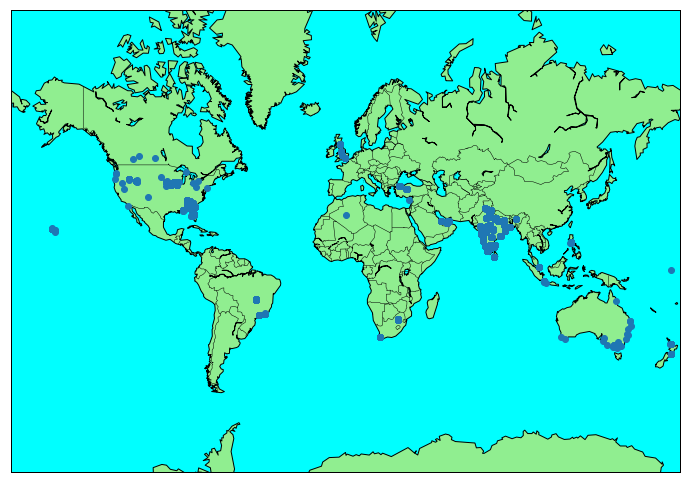

In [68]:
plt.figure(figsize = (12, 10))
m = Basemap(projection = "merc", llcrnrlat = -73, llcrnrlon = -180, urcrnrlat = 80, urcrnrlon = 180)
x, y = m(restaurants_with_locations.Longitude.tolist(), restaurants_with_locations.Latitude.tolist())
m.plot(x, y, "o")
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color = "lightgreen", lake_color = "aqua")
m.drawmapboundary(fill_color = "aqua")
plt.show()

Визуализираме къде са съсредоточени най-много ресторанти.

We visualize where are the most of restaurants.

In [69]:
def plot_restaurants(data_restaurants_arg, title = "Restaurant densities"):
    plt.figure(figsize = (15, 10))
    m = Basemap(projection = "merc", llcrnrlat = -73, llcrnrlon = -180, urcrnrlat = 80, urcrnrlon = 180)

    # Prepare histogram bins
    num_bins = 100
    lon_bins = np.linspace(-180, 180, num_bins + 1)
    lat_bins = np.linspace(-90, 90, num_bins + 1)

    # Create 2D histogram values
    density, x_breaks, y_breaks = np.histogram2d(
        data_restaurants_arg.Latitude,
        data_restaurants_arg.Longitude, 
        [lat_bins, lon_bins])

    # Create the basis of the histogram - the (x, y) value pairs
    # and map them to 2D distances
    lon_bins_2d, lat_bins_2d = np.meshgrid(lon_bins, lat_bins)
    x, y = m(lon_bins_2d, lat_bins_2d)

    m.drawcoastlines()
    m.drawcountries()
    m.pcolormesh(x, y, density)
    m.colorbar()
    plt.title(title)
    plt.show()

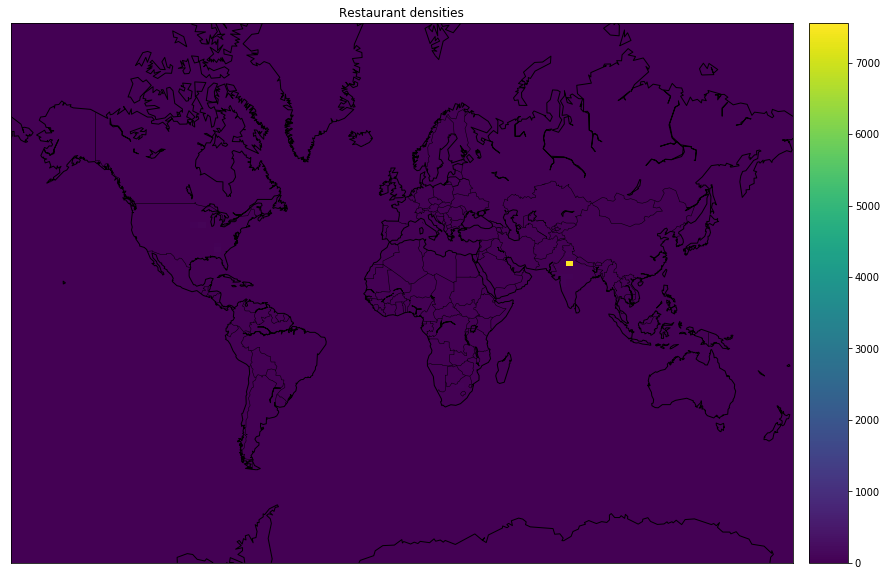

In [70]:
plot_restaurants(restaurants_with_locations)

Проверяваме дали има ресторанти без име в таблицата.

We check whether there are any restaurant without a name in the table.

In [ ]:
data_restaurants["Restaurant Name"].isna().any()

In [ ]:
data_restaurants.describe().T

Правим хистограма на рейтингите на ресторантите.

We make a histogram of restaurant reatings.

In [ ]:
plt.hist(data_restaurants["Aggregate rating"])
plt.xlabel("Rating")
plt.ylabel("Number of restaurants")
plt.show()

In [ ]:
data_restaurants["Aggregate rating"].skew()

Проверяваме какъв е цвета на ресторантите с рейтинг 0.

We check what is the color of restaurants with rating equal to 0.

In [ ]:
data_restaurants[data_restaurants["Aggregate rating"] == 0]["Rating color"]

In [ ]:
data_restaurants["Rating color"].unique()

Тъй като в описанието на данните в тази таблица е записано, че рейтинга на ресторантите е между 1 и 5 и виждаме, че цветовете в колона "Rating color" са 6, ще премахнем тези без рейтинг (с рейтинг 0).

Since in the description of the dataset is written that the restaurant's rating is between 1 and 5 and we notice that the colors in "Rating color" column are 6, we will remove those without a rating (with rating 0).

In [ ]:
restaurants_with_rating = data_restaurants[data_restaurants["Aggregate rating"] != 0]

Правим нова хистограма, този път само с ресторантите с рейтинг.

We make new histogram, this time of the restaurants with rating.

In [ ]:
plt.hist(restaurants_with_rating["Aggregate rating"])
plt.xlabel("Rating")
plt.ylabel("Number of restaurants")
plt.show()

In [ ]:
restaurants_with_rating["Aggregate rating"].skew()

Забелязваме съществено подобрение.

We notice a significant improvment.

In [ ]:
restaurants_with_rating["Aggregate rating"].describe()

In [ ]:
plt.boxplot(restaurants_with_rating["Aggregate rating"])
plt.show()

Ще проверим има ли зависимост и колко силна е тя между отделните колони.

We will check if there is a correlation and how strong is it between the individual columns.

In [ ]:
restaurants_with_rating.corr()

Виждаме, че има по-силно изразена корелация между "Aggregate rating" и "Country Code", "Aggregate rating" и "Price range", "Aggregate rating" и "Votes". Забелязваме и много силна корелация между "Country Code" и "Longitude", което е разбираемо. Ние ще разгледаме първите две зависимости.

We see that there is a stronger correlation between "Aggregate rating" and "Country Code", "Aggregate rating" and "Price range", "Aggregate rating" and "Votes". We notice and a very strong correlation between "Country Code" and "Longitude", which is understandable. We will examine the first two dependencies.

In [ ]:
plt.scatter(restaurants_with_rating["Aggregate rating"], restaurants_with_rating["Country Code"])
plt.xlabel("Rating")
plt.ylabel("Country code")
plt.show()

Проверяваме дали има страни с код 0.

We chech whether there are countries with code 0.

In [ ]:
restaurants_with_rating[restaurants_with_rating["Country Code"] == 0]

In [ ]:
plt.scatter(restaurants_with_rating["Aggregate rating"], restaurants_with_rating["Price range"])
plt.xlabel("Rating")
plt.ylabel("Price range")
plt.show()

Сега ще разгледаме колоната "Average Cost for two".

We well take a look at "Average Cost for two" column.

In [ ]:
plt.hist(data_restaurants["Average Cost for two"])
plt.title("All currencies")
plt.xlabel("Price")
plt.ylabel("Number of restaurants")
plt.show()

In [ ]:
data_restaurants["Average Cost for two"].skew()

Както се забелязва има огромна разлика между цените, но това се дължи на това, че сме визуализирали различни валути на едно място. Затова ще сортираме данните по валути и ще ги изобразим по отделно.

As we can see, there is a huge difference between the prices, but this is because we have visualized different currencies at the same histogram. For that reason we will sort the data by currency and we will represent them separately.

In [ ]:
list(restaurants_with_rating["Currency"].unique())

In [ ]:
grouped_restaurants = restaurants_with_rating.groupby('Currency', sort = False).count()
sorted_restaurants_by_currency = grouped_restaurants.sort_values(by = 'Aggregate rating', ascending = False)
sorted_restaurants_by_currency

In [ ]:
restaurants_with_cost_for_two = restaurants_with_rating[restaurants_with_rating["Average Cost for two"] != 0]

In [ ]:
for currency, data in restaurants_with_cost_for_two.groupby('Currency', sort = False):
    #plt.hist(data[data["Average Cost for two"] < 3000]["Average Cost for two"])
    plt.hist(data["Average Cost for two"])
    plt.title(currency)
    plt.xlabel("Price")
    plt.ylabel("Number of restaurants")
    plt.show()

Забелязваме сравнително еднакви тенденции между цената и броя ресторанти при съотвентата валута - повече ресторанти са с по-ниски цени.

We observe relatively similar trends between the price and the number of restaurants of the respective currency - more restaurants are cheaper. 

In [ ]:
for currency, data in restaurants_with_rating.groupby('Currency', sort = False):
    #plt.hist(data[data["Average Cost for two"] < 3000]["Aggregate rating"])
    plt.hist(data["Aggregate rating"])
    plt.title(currency)
    plt.xlabel("Rating")
    plt.ylabel("Number of restaurants")
    plt.show()

Тенденцията при рейтинга за същите ресторанти е почти еднаква. При повечето валути забелязваме, че повечето ресторанти са с рейтинг по-висок от средния.

The rating trend for the same restaurants is almost the same. In most currencies we notice that most of the restaurants are with a rating higher than the average.

In [ ]:
for currency, data in restaurants_with_rating.groupby('Currency', sort = False):
    plt.title(currency)
    plt.scatter(data["Aggregate rating"], data["Average Cost for two"])
    plt.xlabel("Rating")
    plt.ylabel("Price range")
    plt.show()
    print(data["Aggregate rating"].corr(data["Average Cost for two"]))

Забелязваме, че при повечето валути имаме тендеция на покачване, по-висока цена - по-висок рейтинг, но не са толкова силно изразени тези зависимости. При други валути забелязваме тенденция на понижаване, но тя е около 0 и няма да я взимаме предвид.

We observe that in the most currencies there is an upward trend, higher price - higher rating, but these dependencies are not very strongly expressed. In other currencies we notice downward trend, but it is about 0 and we will not take it into account.

За да са по-обективни рейтингите на ресторантите можем да вземем тези, за които са гласували повече от 30 човека, но тъй като за някои видове валути нямаме много голям брой ресторанти, ще остане малък брой за сравнение, което от своя страна ще доведе до изменения и неточни резултати.

To make restaurants ratings more objective we can take those for which more than 30 people are voted. But since for some currencies there are a big amount of restaurants, there will be a small number for comparison, which will lead to changes and inaccurate results.

In [ ]:
restaurants_with_30 = restaurants_with_rating[restaurants_with_rating["Votes"] > 30]
for currency, data in restaurants_with_30.groupby('Currency'):
    #plt.hist(data[data["Average Cost for two"] < 3000]["Aggregate rating"])
    plt.hist(data["Aggregate rating"])
    plt.title(currency)
    plt.xlabel("Rating")
    plt.ylabel("Number of restaurants")
    plt.show()

Ще направим и графика за средните стойности на рейтингите спрямо валутите, както и за същите стойности спрямо градовете, в които се намират ресторантите.

We will plot the rating average values against the currencies, also for the same values against cities in which the restaurants are located.

In [ ]:
mean_rating_by_currency = restaurants_with_rating.groupby('Currency', sort = False)["Aggregate rating"].mean()
mean_rating_by_currency

In [ ]:
plt.figure(figsize = (12, 7))
plt.barh(mean_rating_by_currency.index, mean_rating_by_currency)
plt.xlabel("Rating")
plt.show()

In [ ]:
mean_rating_by_city = restaurants_with_rating.groupby('City', sort = False)["Aggregate rating"].mean()
sorted_mean_rating_by_city = mean_rating_by_city.sort_values(ascending = False)
sorted_mean_rating_by_city

In [ ]:
plt.figure(figsize = (12, 40))
plt.barh(sorted_mean_rating_by_city.index, sorted_mean_rating_by_city)
plt.xlabel("Rating")
plt.show()

Виждаме, че при градовете средната оценка е доста различна. Но това може да се дължи на недостатъчен брой данни. Затова ще пробваме с ресторанти с над 30 гласа и ще ги групираме по градове.

We see that the average score of the cities is quite different. But this may be due to insufficient number of observations. For that reason we will get those restaurants for which more than 30 people are voted and we will group them by cities.

In [ ]:
mean_rating_by_city_30 = restaurants_with_30.groupby('City', sort = False)["Aggregate rating"].mean()
sorted_mean_rating_by_city_30 = mean_rating_by_city_30.sort_values(ascending = False)
sorted_mean_rating_by_city_30

In [ ]:
plt.figure(figsize = (12, 40))
plt.barh(sorted_mean_rating_by_city_30.index, sorted_mean_rating_by_city_30)
plt.xlabel("Rating")
plt.show()

Виждаме, че и сега имаме големи амплитуди в средните оценки на заведенията спрямо градовете, в които се намират.

We notice that even now there are big amplitudes at the averege ratings of the restaurants against cities in which they are located.

В следващите редове ще извадим и преработим видовете кухни от ресторантите за да можем да ги свържем с третия сет от данни, който ще заредим.

In the following rows we will pull out and rework the types of cuisines of the restaurants, so we can connect them with the next data set, which we will load.

In [ ]:
restaurants_with_cuisine = restaurants_with_rating[restaurants_with_rating["Cuisines"].notna()]

In [ ]:
list(restaurants_with_cuisine["Cuisines"].unique())

### Трети сет от данни - Готварски рецепти

### Third dataset - Cooking recipes

Зареждаме третия сет от данни, който е свързан с готварски рецепти. За всяка е записана типа кухня, както и продуктите, които се използват за приготвянето ѝ.

We load the third dataset, which is associated with cooking recipes. For each one is recorded the type of cuisine and the products necessary for its preparation.

In [ ]:
data_recipes = pd.read_csv("srep00196-s3/srep00196-s3.csv", sep='\t', low_memory=False)
data_recipes

In [ ]:
data_recipes = data_recipes.drop(data_recipes.index[[0,1,2]])
data_recipes = data_recipes.rename(columns = {"#" : "gg"})
data_recipes

In [ ]:
data_recipes['cuisine'] = data_recipes["gg"].str.extract('(\w+)', expand = True)
data_recipes['ingredients'] = data_recipes["gg"].str.extract('(,[a-z].{,})', expand = True)
data_recipes = data_recipes.drop("gg", axis=1)

In [ ]:
print(data_recipes.shape)

In [ ]:
data_recipes.groupby('cuisine', sort = False)["cuisine"].count()

Сменяме видовете кухни от сета с ресторантите с тези от сета с рецептите за да можем да ги свържем логически.

We replace the types of cuisines from Restaurants dataset with those from Recipes dataset so we can connect them logically.

In [ ]:
list(data_recipes["cuisine"].unique())

In [ ]:
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Japanese", "EastAsian")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Korean", "EastAsian")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Chinese", "EastAsian")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Sushi", "EastAsian")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Filipino", "SoutheastAsian")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Indian", "SouthAsian")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Arabian", "MiddleEastern")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Lebanese", "MiddleEastern")

restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Mexican", "LatinAmerican")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Brazilian", "LatinAmerican")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Peruvian", "LatinAmerican")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Latin American", "LatinAmerican")

restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Italian", "SouthernEuropean")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Pizza", "SouthernEuropean")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("French", "WesternEuropean")

restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("American", "NorthAmerican")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Bar Food", "NorthAmerican")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Grill", "NorthAmerican")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Burger", "NorthAmerican")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Fast Food", "NorthAmerican")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Steak", "NorthAmerican")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("BBQ", "NorthAmerican")

restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Desserts", "Other")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Tea", "Other")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Bubble Tea", "Other")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Breakfast", "Other")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Diner", "Other")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Vegetarian", "Other")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Coffee and Tea", "Other")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Bakery", "Other")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Cafe", "Other")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Beverages", "Other")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Juices", "Other")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Healthy Food", "Other")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Juices", "Other")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Ice Cream", "Other")

restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Turkish", "MiddleEastern")

restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Finger Food", "NorthAmerican")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Hawaiian", "NorthAmerican")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Soul Food", "NorthAmerican")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Canadian", "NorthAmerican")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Cajun", "NorthAmerican")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Gourmet NorthAmerican", "NorthAmerican")

restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Singaporean", "SoutheastAsian")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Malay", "SoutheastAsian")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Vietnamese", "SoutheastAsian")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Thai", "SoutheastAsian")

restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Irish", "WesternEuropean")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Australian", "WesternEuropean")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Modern Australian", "WesternEuropean")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("German", "WesternEuropean")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("European", "WesternEuropean")

restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Greek", "SouthernEuropean")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Spanish", "SouthernEuropean")

restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Tex-Mex", "LatinAmerican")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Caribbean", "LatinAmerican")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Tapas", "LatinAmerican")

restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Teriyaki", "EastAsian")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Goan", "SouthAsian")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Naga", "SouthAsian")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Andhra", "SouthAsian")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Kashmiri", "SouthAsian")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Kerala", "SouthAsian")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Gujarati", "SouthAsian")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Bihari", "SouthAsian")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Rajasthani", "SouthAsian")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Biryani", "SouthAsian")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Hyderabadi", "SouthAsian")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Nepalese", "SouthAsian")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Mithai", "SouthAsian")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Lucknowi", "SouthAsian")

restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("British", "WesternEuropean")

restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Afghani", "MiddleEastern")

restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Tibetan", "EastAsian")

restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("SouthernWesternEuropean", "SouthernEuropean")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("North SouthAsian", "SouthAsian")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("LatinNorthAmerican", "LatinAmerican")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("South SouthAsian", "SouthAsian")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("WesternWesternEuropean", "WesternEuropean")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Raw Meats", "Other")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Drinks Only", "Other")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Salad", "Other")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Fusion", "Other")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("International", "Other")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Continental", "Other")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Coffee and Other", "Other")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Bubble Other", "Other")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Sandwich", "Other")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Street Food", "Other")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Seafood", "Other")

restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Oriya", "SouthAsian")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Awadhi", "SouthAsian")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Burmese", "SouthAsian")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Assamese", "SouthAsian")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Bengali", "SouthAsian")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Chettinad", "SouthAsian")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Parsi", "SouthAsian")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Maharashtrian", "SouthAsian")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Mughlai", "SouthAsian")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Pakistani", "SouthAsian")

restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Iranian", "MiddleEastern")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Middle Eastern", "MiddleEastern")

restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Cantonese", "EastAsian")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Dim Sum", "EastAsian")

restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Belgian", "WesternEuropean")

restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Portuguese", "SouthernEuropean")

restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Cuban", "LatinAmerican")

restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("New NorthAmerican", "NorthAmerican")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Pub Food", "NorthAmerican")

restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Modern WesternEuropean", "WesternEuropean")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Mediterranean", "SouthernEuropean")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("North Eastern", "Other")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Deli", "Other")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Modern SouthAsian", "SouthAsian")

restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("EastAsian", "EastAsia")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("SoutheastAsian", "SoutheastAsia")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("SouthAsian", "SouthAsia")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Asian", "Other")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("EastAsia", "EastAsian")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("SoutheastAsia", "SoutheastAsian")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("SouthAsia", "SouthAsian")

restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Ramen", "EastAsian")

restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Mangalorean", "SouthAsian")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Durban", "SouthAsian")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Sri Lankan", "SouthAsian")

restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Restaurant Other", "Other")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("World Cuisine", "Other")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Patisserie", "Other")

restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Bí_rek", "MiddleEastern")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Dí_ner", "MiddleEastern")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Izgara", "MiddleEastern")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Kebab", "MiddleEastern")

restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Durban", "African")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("South African", "African")

restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Argentine", "LatinAmerican")

restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Indonesian", "SoutheastAsian")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Kiwi", "WesternEuropean")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Curry", "SouthAsian")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Taiwanese", "EastAsian")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Fish and Chips", "NorthAmerican")

restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("WesternEuropean", "WestEuropean")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Western", "WesternEuropean")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("WestEuropean", "WesternEuropean")

restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Contemporary", "Other")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Scottish", "WesternEuropean")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Peranakan", "SoutheastAsian")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Sunda", "SoutheastAsian")

restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Other Other", "Other")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Charcoal NorthAmerican", "NorthAmerican")

restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Moroccan", "African")

In [ ]:
#african_restaurants = restaurants_with_cuisine[restaurants_with_cuisine["Cuisines"].str.contains("African")]

За всяка кухня взимаме всички продукти.

For each cuisine we get all the products.

In [ ]:
cuisine_list, ingredients_list = [], []
for cuisine, data in data_recipes.groupby('cuisine', sort = False):
    cuisine_list.append(cuisine)
    ingredients_list.append(data.ingredients)

Ще използваме Counter за да преброим кои са най-използваните 20 продукта във всяка кухня.

We will use Counter to count which are the most used 20 ingredients in every cuisine.

In [ ]:
top_20_ingredients = []
for set_of_ingredients in ingredients_list:
    ingredients_string = ''.join(set_of_ingredients)
    text_words = re.split("\W+", ingredients_string)
    word_counter = Counter(text_words)
    top_20_ingredients.append(word_counter.most_common(25))

Взимаме средното аритметично за мазнини съдържащи се в 100г. продукт за всеки един продукт.

We take the mean value of fat contained in 100g of product for each ingredient.

In [ ]:
def get_mean_per_ingredient(ingredient_arg):
    E_list = []
    for element in product_names_list:
        founded = re.findall(ingredient_arg, element)
        if founded:
            E_list.append(data_with_fat_100g.loc[data_with_fat_100g["product_name"] == element]["fat_100g"])
            #E_list.append(data_with_fat_100g[data_with_fat_100g["product_name"] == element]["fat_100g"])
        else:
            E_list.append(1)
    print(list(E_list))
    pu = (sum(E_list)+1) / (len(E_list)+1)
    return pu

#get_mean_per_ingredient("tomato")

In [ ]:
cuisine_mean_list = []
E_mean = 0.0
for set_big in top_20_ingredients:
    for ingredient in set_big:
        for m in ingredient:
            if isinstance(m, int):
                break
            else:
                E_mean = get_mean_per_ingredient(m)
                if E_mean:
                    cuisine_mean_list.append(E_mean)

print(cuisine_mean_list)

### Заключение

От нашето проучване можем да заключим, че оценките на най-предпочитаните ресторанти в света, дадени от хара се влияят от много фактори. От предварителното проучване, разбираме, че оценките на потреителите се влияят до голяма степен от социалните мрежи, от награди, спечелени от заведението и от управлението на ресторанта. Ние доказахме, че резултатите се определят също така и от ценовата категория, града и държавата в който се намира заведението. Опитахме се да покажем дали има връзка между оценките и състава на хранителните продукти, което и беше нашата хипотеза, но в следващата статия ще се изясни това.

### References

[1] https://www.modernrestaurantmanagement.com/the-impact-of-reviews-on-the-restaurant-market-infographic/

[2] https://www.bighospitality.co.uk/Article/2014/02/12/TripAdvisor-study-gives-insight-into-impact-of-reviews

[3] Woo Gon Kim, Jun (Justin) Li, Robert A. Brymer, 2016, The impact of social media reviews on restaurant performance: The moderating role of excellence certificate